In [1]:
import numpy as np
import cv2
from pathlib import Path

In [2]:
path = Path("F:/data/yuanfazhao_data_05")

In [6]:
path.glob("*")

<generator object Path.glob at 0x00000273251AE150>

In [13]:
patient_file = []
patient_file += list(path.glob("*"))

In [15]:
patient_file

[WindowsPath('F:/data/yuanfazhao_data_05/N0-1978-wangyunqing'),
 WindowsPath('F:/data/yuanfazhao_data_05/N0-2115-tangliru'),
 WindowsPath('F:/data/yuanfazhao_data_05/N0-2201-ruanguanfu'),
 WindowsPath('F:/data/yuanfazhao_data_05/N0-484-wulong'),
 WindowsPath('F:/data/yuanfazhao_data_05/N0-485-wulingbo'),
 WindowsPath('F:/data/yuanfazhao_data_05/N0-60-wangguiping'),
 WindowsPath('F:/data/yuanfazhao_data_05/N1-2525-liwanfeng'),
 WindowsPath('F:/data/yuanfazhao_data_05/N1-2621-jinyanlai'),
 WindowsPath('F:/data/yuanfazhao_data_05/N2-1062-huangxueqi'),
 WindowsPath('F:/data/yuanfazhao_data_05/N2-1901-xiafafu'),
 WindowsPath('F:/data/yuanfazhao_data_05/N2-2403-liushaogang'),
 WindowsPath('F:/data/yuanfazhao_data_05/N2-2506-lixiuqing'),
 WindowsPath('F:/data/yuanfazhao_data_05/N2-541-wangwuping'),
 WindowsPath('F:/data/yuanfazhao_data_05/N2-557-wanglijuan'),
 WindowsPath('F:/data/yuanfazhao_data_05/N2-607-wanhongliang')]

In [16]:
label_file = []
for patient in patient_file:
    label_file += list((patient / "Lable").glob("*"))

In [18]:
len(label_file)

150

In [27]:
def area_count(label_file):
    count = {}
    
    for file in label_file:
        srcimg = cv2.imread(str(file), 0)
        
        temp_img = np.copy(srcimg)
        
        contours, hierarchy = cv2.findContours(temp_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        c_max = sorted(contours, key=cv2.contourArea, reverse=True)[0]
        
        area = cv2.contourArea(c_max)
        
        if(area >= 3136):
            count[str(file)] = area
            
    return count

In [35]:
statics = area_count(label_file)

In [37]:
statics

{'F:\\data\\yuanfazhao_data_05\\N2-2506-lixiuqing\\Lable\\094.bmp': 3319.0,
 'F:\\data\\yuanfazhao_data_05\\N2-2506-lixiuqing\\Lable\\095.bmp': 4319.0,
 'F:\\data\\yuanfazhao_data_05\\N2-2506-lixiuqing\\Lable\\096.bmp': 4941.0,
 'F:\\data\\yuanfazhao_data_05\\N2-2506-lixiuqing\\Lable\\097.bmp': 5461.5,
 'F:\\data\\yuanfazhao_data_05\\N2-2506-lixiuqing\\Lable\\098.bmp': 6199.5,
 'F:\\data\\yuanfazhao_data_05\\N2-2506-lixiuqing\\Lable\\099.bmp': 6070.5,
 'F:\\data\\yuanfazhao_data_05\\N2-2506-lixiuqing\\Lable\\100.bmp': 5939.0,
 'F:\\data\\yuanfazhao_data_05\\N2-2506-lixiuqing\\Lable\\101.bmp': 4610.0,
 'F:\\data\\yuanfazhao_data_05\\N2-2506-lixiuqing\\Lable\\102.bmp': 3526.5,
 'F:\\data\\yuanfazhao_data_05\\N2-2506-lixiuqing\\Lable\\103.bmp': 3293.0}

In [30]:
def area_count_2(label_file):
    count = []
    
    for file in label_file:
        srcimg = cv2.imread(str(file), 0)
        
        temp_img = np.copy(srcimg)
        
        contours, hierarchy = cv2.findContours(temp_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        c_max = sorted(contours, key=cv2.contourArea, reverse=True)[0]
        
        area = cv2.contourArea(c_max)
        
        count.append(area)
            
    return count

In [33]:
areas = area_count_2(label_file)

In [39]:
print(np.min(areas), np.max(areas), np.mean(areas), np.median(areas), np.var(areas), np.std(areas))

9.0 6199.5 1088.3333333333333 592.25 1639953.1355555556 1280.6065498643818


In [41]:
import matplotlib.pyplot as plt

(array([79., 27., 11., 15.,  8.,  3.,  1.,  2.,  1.,  3.]),
 array([   9.  ,  628.05, 1247.1 , 1866.15, 2485.2 , 3104.25, 3723.3 ,
        4342.35, 4961.4 , 5580.45, 6199.5 ]),
 <a list of 10 Patch objects>)

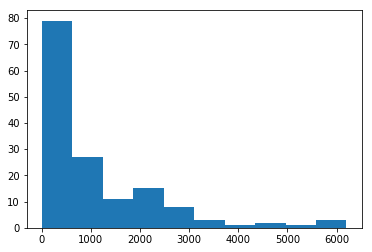

In [42]:
areas = np.array(areas)
plt.hist(areas)